Peptide Calculator API 

https://www.pep-calc.com/

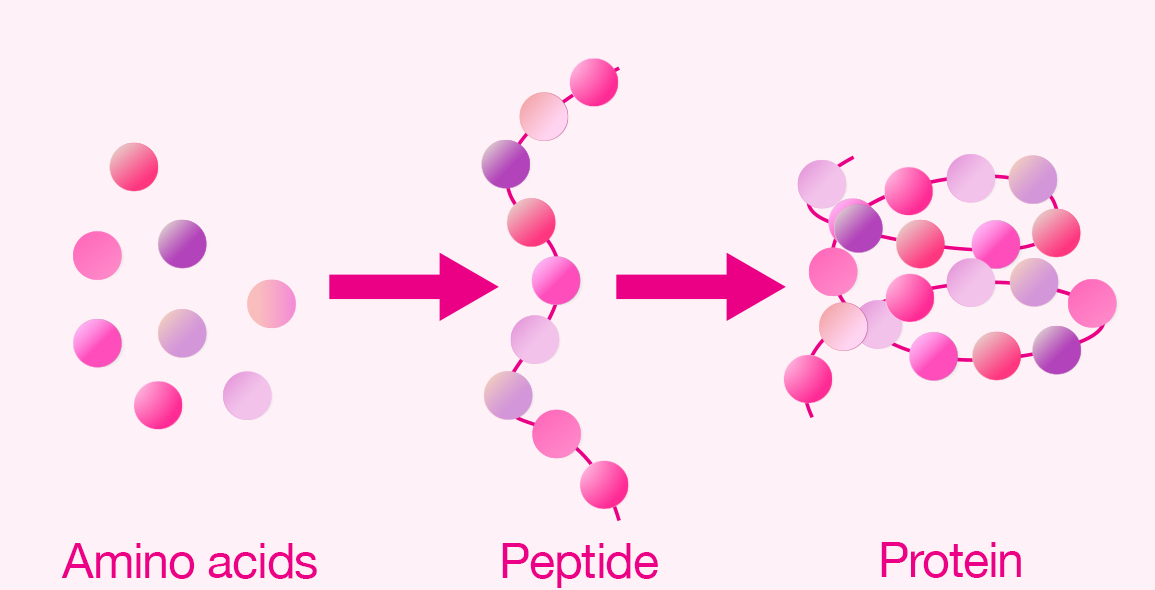


Our Project Plan:

Must do's:

1) searching for a queried peptide sequence

2) to calculate the molecular weight of the peptide

3) to calculate and return the fragment ion masses of the peptide

Should do's:

1) Generate an alanine scan of the peptide sequence, where an alanine or letter ‘A’ is introduced at every position in the peptide sequence 

2) Plot a Beta contiguity calculation from the alanine scanning in graph package Matplotlib 

Coulds do's:

1) created a dictionary for alternative dye modifications

2) Link the Beta Contiguity plots with the new Alanine library to a html webpage


In [ ]:

#Use of requests, a HTTP library for Python

def peptideBasics(sequence, Nterm, Cterm):
    resp = requests.get("http://api.pep-calc.com/peptide?seq=" + sequence + "&N_term=" + Nterm + "&C_term=" + Cterm + "&mz=")

    print(resp)
    data = resp.json()
    return data

#Asks the user for a 1. A peptide sequence 2. N-terminal modification 3. C-terminal modification and returns the following outputs:

sequence=input('What is your peptide sequence?')
Nterm=input('What is your N-terminal modification?')
Cterm=input('What is your C-terminal modification?')

#Returns the following output:
# 'molecularWeight': A number corresponding to the mass of the sequence
# 'nString': A string corresponding to the N-terminal modification
# 'seqList': A list format of the peptide sequence 


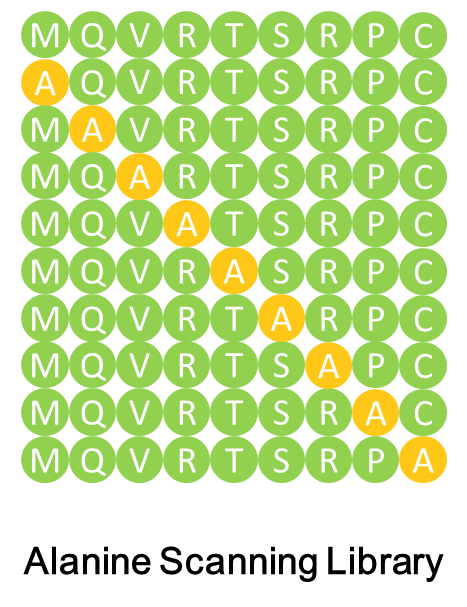

In [ ]:
#Alanine Scanning Code:

# Takes the 'seqList' output of Get-requests and iterate over the sequence to replace an A in every position of the sequence. 
(Where the enumerate function has added a counter to the iterable (each letter of the amino acid sequence) in order to allow this.
# This requires creation of an empty list_of_sequences = [] and then the for loop runs through the empty tuples created by enumerate and puts in the sequence into this
# The append function then adds the new_list with the A put in to the empty list_of_sequences.

for (i, item) in enumerate(seqList):
    Ala_Sequence = new_list = []

    for sub_item in seqList:
        new_list.append(sub_item)

    new_list[i] = 'A'

    print(Ala_Sequence)
    
    

    seq = AlaSequencetoString(Ala_Sequence)

    print("Sequence: ", seq)

    al_data = peptideAlaBasics(seq, Nterm, Cterm)

    print(al_data)

In [ ]:
#Two functions are defined for the Alanine Scanning Code

#The first turns the Alanine sequence into a string which then feeds back into the original API calculator.

def AlaSequencetoString(Ala_Sequence):
    str1 = " "
    return(str1.join(Ala_Sequence))

def peptideAlaBasics(Ala_Sequence, Nterm, Cterm):
    resp = requests.get(
        "http://api.pep-calc.com/peptide?seq=" + Ala_Sequence + "&N_term=" + Nterm + "&C_term=" + Cterm + "&mz=")

    print(resp)
    Aladata = resp.json()
    return Aladata

In [ ]:
#The Mass Ion Series get requests is defined by the following for loop which takes the Molecular Weight generated and calculates the ion series:

 mz = al_data['molecularWeight']

    totalmass = float(mz)

    fragments = []

    for n in range(2, 5):
        fragments.append((totalmass + n) / n)

    print("Mass ion series [2H+, 3H+, 4H+]:", fragments)


In [ ]:
Beta Contiguity Calculator:
    
# The Beta contiguity calculator is linked in to a module called 'Matplotlib' which can be used for drawing plots. 
# It will take the many beta contig output lists generated for each amino acid residue of the new sequence and then the for loop below will search for the second element of the list (b[1]) and
#the third element of the list which is the contiguity value, turn it from a string into a floating point number using float.


    betacontig = peptideBetacontinguity(seq, Nterm, Cterm)

    print(betacontig)

    plt.figure()

    beta = betacontig['betaContiguity']

    if beta is not None:
        labellist = []
        valuelist = []

        for b in beta:
            labellist.append(b[1])
            valuelist.append(float(b[2]))

        plt.plot(valuelist)
        plt.xticks(np.arange(len(beta)), labellist)


        plt.show()


#  There is an if statement written into the Beta contiguity code as for some sequences entered it is not possible to calculate a
# beta contiguity value and therefore needs to be told as long as beta is not none plot it:
# if beta is not None:
#     labellist = []
#     valuelist = []




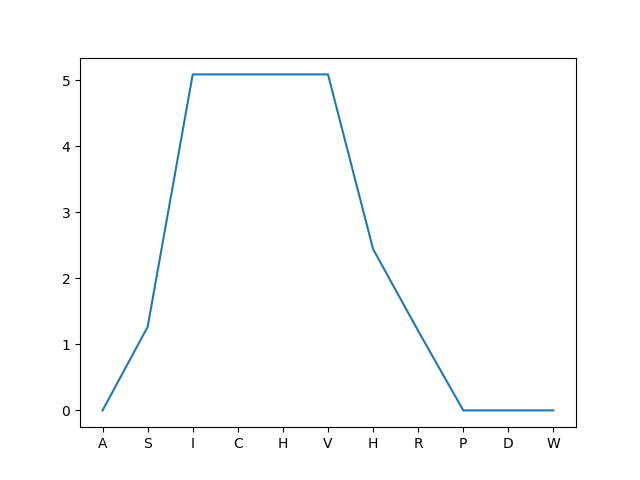

The Beta Contiguity graph for the first Alanine sequence generated

Uses and novel features of our code:

- Calculate and predict features of a chosen peptide based on its amino acid sequence (Must-do aim)

- Expand single peptide sequence calculations into multiple calculations for an alanine library of peptides. This could also be applied easily to other amino acid substitutions other than alanine and used by chemists for their everyday mass calculations. 


Possible extensions of the code:

1. Create a webpage for the code

2. Add in a library of fluorescent dyes commonly linked to peptide sequences 

3. Add in a N15 isotopic calculation function



Thanks for listening! #jupyter nbconvert CFG.ipynb --to slides --post serve 